# Deep Learning Primer
![DL](https://www.ionos.de/digitalguide/fileadmin/DigitalGuide/Teaser/machine-learning-t.jpg)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## From the Perceptron to a Dense Layer
![foo](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Single-Perceptron.png.webp)

Neuron pre-activation (or input activation):

$$ z(\textbf{x}) = b + \sum_i w_ix_i = b + \mathbf{w}^T\mathbf{x}$$

Neuron (output) activation:
$$a(z) = \sigma(z(\textbf{x})) = \sigma(b + \sum_i w_ix_i )$$

In [3]:
W = np.array([-1, 2])
X = np.array([2,3])

z = np.dot(X,W) 

### Non-Linearity

Binary Step: $$sigma(z) = \begin{cases}
1,  & \text{if $z$ > 0} \\
0, & \text{else}
\end{cases}$$
Sigmoid: $$sigma(z) = \frac{1}{1+e^{-z}}$$
tanh: $$sigma(z) = tanh(z)$$

ReLU: $$sigma(z) =
\begin{cases}
z,  & \text{if $z$ > 0} \\
0, & \text{else}
\end{cases}$$

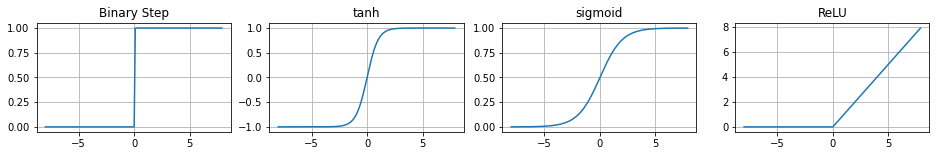

In [4]:
x = np.arange(-8, 8, 0.1)

fig, ax = plt.subplots(1, 4, figsize=(16,2),sharex=True)

ax[0].plot(x,np.trunc(np.clip(x+0.99,0,1)))
ax[0].grid()
ax[0].set_title("Binary Step")

ax[1].plot(x,np.tanh(x))
ax[1].grid()
ax[1].set_title("tanh")

ax[2].plot(x,(1/(1+np.exp(-x))))

ax[2].grid()
ax[2].set_title("sigmoid")

ax[3].plot(x,np.maximum(0.,x))
ax[3].grid()
ax[3].set_title("ReLU")

plt.show()

### One Perceptron

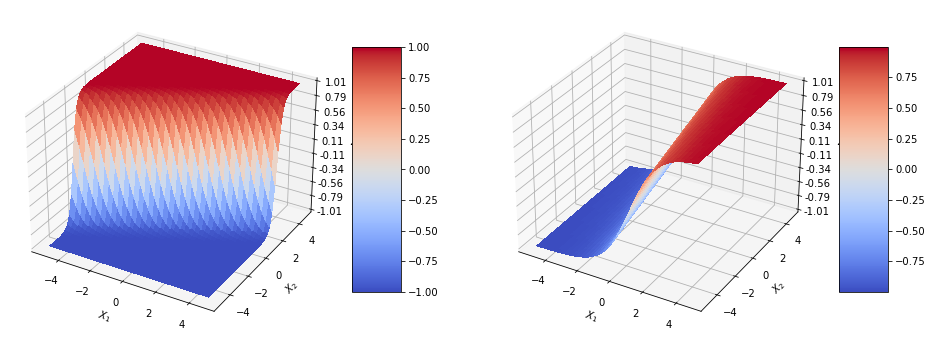

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Plot the surface.
fig = plt.figure(figsize=(16,9))

def make_image_surface_plot(ax, X, Z):
    surf = ax.plot_surface(X[0], X[1], Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    # Customize the z axis.
    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")
    ax.set_zlabel("$Z$")

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

X = np.mgrid[-5:5:0.25, -5:5:0.25]
    
# Make data.
ax = fig.add_subplot(1, 2, 1, projection='3d')
W1 = np.array([-1, 2])
Z1 = np.tanh(X[0] * W1[0] + X[1] * W1[1])
make_image_surface_plot(ax, X, Z1)

# Make data.
ax = fig.add_subplot(1, 2, 2, projection='3d')
W2 = np.array([0.6, 0.1])
Z2 = np.tanh(X[0] * W2[0] + X[1] * W2[1])
make_image_surface_plot(ax, X, Z2)

plt.show()

### Going Deeper
![Deep](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png)

### How to train a perceptron
Make a prediction with weights

Sources: 
- https://www.engineerknow.com/2021/12/gradient-descent-with-interactive.html?m=1

In [6]:
from ipywidgets import interactive

x_poly = np.linspace(-3,5,81)
x_start = -3

def cost_function(X):
    return 2*X**2-4*X

def gradient(X):
    return  (4*X) -4

y_poly = cost_function(x_poly)

def f(iterations,learning_rate):
    x_path = np.empty(iterations,)
    x_path[0] = x_start
    for i in range (1,iterations):
        derivative =gradient(x_path[i-1])
        x_path[i] = x_path[i-1]-(derivative*learning_rate)
    x_path
    plt.plot(x_poly,y_poly)
    plt.plot(x_path,cost_function(x_path),'-o')

interactive_plot = interactive(f,iterations = (1,20),learning_rate= (0.01,1,.1))
interactive_plot

interactive(children=(IntSlider(value=10, description='iterations', max=20, min=1), FloatSlider(value=0.410000…

### Stochastic Gradient Decent

No math - let's save that for the masters course!

Source: 
- https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

In [7]:
def predict(row, weights):
    activation = weights[0]   # bias
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

Estimate Perceptron weights using stochastic gradient descent

In [8]:
def train_weights(train, l_rate, n_epoch):
    # initialize with random float. In this case we are doing it with 0 to make it reproducible
    weights = [0.0 for i in range(len(train[0]))]

    # here we are iterating ``n_epoch`` times over the entire dataset
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

#### Learning the data
Calculate weights, based on given data.

In [9]:
dataset = np.array([[2.7810836, 2.550537003, 0],
    [1.465489372, 2.362125076, 0],
    [3.396561688, 4.400293529, 0],
    [1.38807019, 1.850220317, 0],
    [3.06407232, 3.005305973, 0],
    [7.627531214, 2.759262235, 1],
    [5.332441248, 2.088626775, 1],
    [6.922596716, 1.77106367, 1],
    [8.675418651, -0.242068655, 1],
    [7.673756466, 3.508563011, 1]])

In [10]:
l_rate = 0.1
n_epoch = 5
W = train_weights(dataset, l_rate, n_epoch)
print(W)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


### Visualize Result

Let's see, how this looks like in 3D-Space.

In [11]:
X = np.mgrid[0:10:0.25, -5:5:0.25]
Z = X[0] * W[1] + X[1] * W[2] + W[0]
Z[Z<0] = 0
Z[Z>0] = 1

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=dataset[:,0], y=dataset[:,1], z=dataset[:,2], 
                                   mode='markers', marker=dict(size=3)),
                     go.Surface(z=Z, x=X[0], y=X[1], opacity=0.2)])
fig.show()

### Further Information:
- [Hugo Larochelle (Google Brain) on the NN Theorie](https://www.youtube.com/watch?v=O2o4oONWCWA)

## Convolutional Neural Networks: Simple MNIST convnet

The following simple example ist taken from the Keras Examples by [fchollet](https://twitter.com/fchollet)
as the orginal author.

The following codetakes the MNIST image dataset as input (images of handwritten images) and performs
a classification on those. The applied simple convnet achieves ~99% test accuracy.

### Setup

In [13]:
import pip
!pip install tensorflow==2.7.0

     |████████████████████████████████| 207.1 MB 112 kB/s eta 0:00:01    |████▉                           | 31.3 MB 5.3 MB/s eta 0:00:34     |█████▎                          | 34.3 MB 1.5 MB/s eta 0:01:54     |████████▍                       | 54.5 MB 5.5 MB/s eta 0:00:28     |██████████▏                     | 65.9 MB 326 kB/s eta 0:07:13     |███████████████▊                | 101.8 MB 5.2 MB/s eta 0:00:21     |█████████████████▎              | 111.8 MB 4.7 MB/s eta 0:00:21
     |████████████████████████████████| 1.6 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 463 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

### Prepare the data
Model / data parameters

In [15]:
num_classes = 10
input_shape = (28, 28, 1)

If not yet done, the data will be downloaded. Then, it is imported. Additionally a split between train and test sets is executed.

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
num_images, _, _ = x_train.shape

11501568/11490434 [==============================] - 2s 0us/step


#### Let's have a look at the input data.

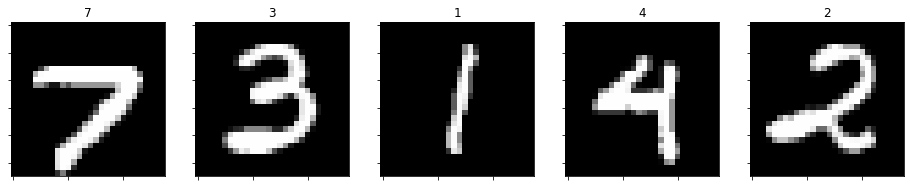

In [17]:
fig, ax = plt.subplots(1,5, figsize=(16,8))
for img_dx in range(5):    
    idx = np.random.randint(num_images)
    ax[img_dx].imshow(x_train[idx], cmap="gray")
    ax[img_dx].set_title(y_train[idx])
    ax[img_dx].set_yticklabels([])
    ax[img_dx].set_xticklabels([])

#### Preprocessing
Scale images to the range of $[0, 1]$. Wer are inputing floats to out model.

In [18]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train.shape

(60000, 28, 28)

Make sure images have shape (28, 28, 1)

In [19]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


 #### Labels
 How does the `y` data look like?

In [20]:
for _ in range(10):    
    idx = np.random.randint(num_images)
    print(y_train[idx])

4
1
8
7
4
8
5
8
2
1


So, we need convert the  class vectors to binary class matrices.

In [21]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [22]:
for _ in range(10):    
    idx = np.random.randint(num_images)
    print(y_train[idx])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Convolutional Neural Networks (CNNs)
!["D Discrete Convolution](https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

### Build our Model
![Architecture](https://davidstutz.de/wordpress/wp-content/uploads/2019/10/cnn.jpg)

In [23]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [24]:
from keras.callbacks import Callback
from IPython.display import clear_output

import time

class LogCallback(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        self.logs = []
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs={None}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.i += 1
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(16,9))

        clear_output(wait=True)

        ax1.plot(self.x, self.losses, label="training loss")
        ax1.plot(self.x, self.val_losses, label="validation loss")
        ax1.set_title("Loss")
        ax1.set_xlabel("Num Epochs")
        ax1.set_ylabel("Loss")
        ax1.grid()
        ax1.legend()

        ax2.plot(self.x, self.acc, label="training accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.set_title("Accuracy")
        ax1.set_xlabel("Num Epochs")
        ax1.set_ylabel("Accuracy [%]")
        ax2.grid()
        ax2.legend()

        plt.show()

    def on_train_end(self, logs=None):
        print(f'Total training time: {time.time()-self.start_time:.2f} sec.')


### Training the model

Here, we are using a `batch_size` of $128$ and $15$ epochs for training the network. $10\%$ of the data is used for validation.

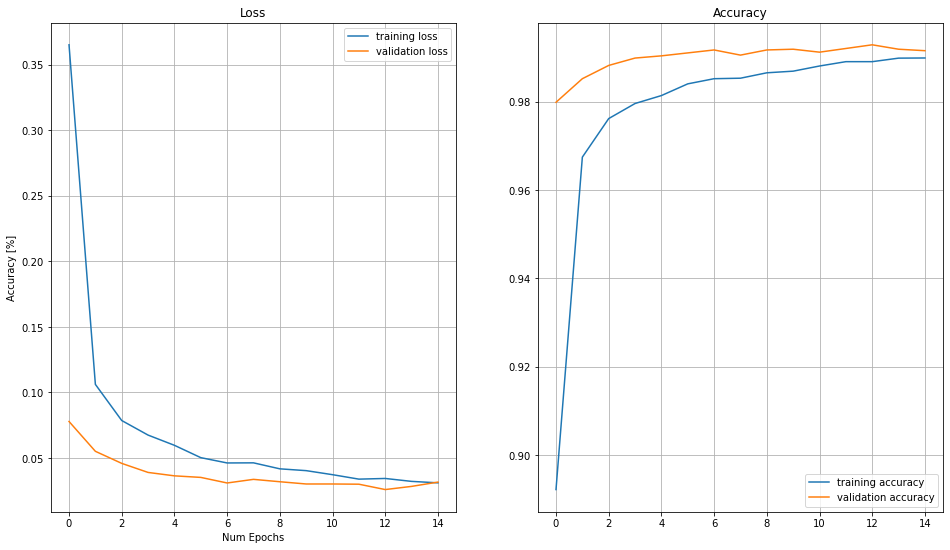

422/422 [==============================] - 28s 65ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.0316 - val_accuracy: 0.9915
Total training time: 378.87 sec.


In [25]:
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1, callbacks=[LogCallback()])

### Evaluate the trained model

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022607283666729927
Test accuracy: 0.9922000169754028


## Recurrent Neural Networks (RNNs): Character-Level Trump Tweet Generator
This notebook is taken from the current course Deep Learning, 4th semester masters. For the application of textual data, we are building a language model.
This sample code demonstrates how to train a stacked LSTM on a set of Tweets and then to generate text that resembles these input Tweets in style. We work with Trump Tweets as collected by the [Trump Twitter Archive](http://www.trumptwitterarchive.com/archive). This form of learning doesn't need manually annotated datasets.


But first...

### Why RNNs?
![RNNs](http://karpathy.github.io/assets/rnn/diags.jpeg)

![unrolling](https://machinelearningmastery.com/wp-content/uploads/2017/08/Example-of-an-RNN-with-a-cycle.png)
![unrolling](https://machinelearningmastery.com/wp-content/uploads/2017/08/Example-of-Unrolled-RNN-on-the-forward-pass.png)

![RNNs](http://karpathy.github.io/assets/rnn/charseq.jpeg)

### Training
The following part demonstrates the training of such an LSTM model.

#### Parameters
Some parameters to set and tune.

In [27]:
SEQUENCE_LEN = 60
BATCH_SIZE = 128
EPOCHS = 15
HIDDEN_LAYERS_DIM = 512
LAYER_COUNT = 4
DROPOUT = 0.2

data_directory = "."

Let's create the vocabulary! Dependend on the dataset and your set locale, it mightl be possible, that you also need to remove other chars.

In [28]:
import string

characters = list(string.printable)
characters.remove('\x0b')
characters.remove('\x0c')

VOCABULARY_SIZE = len(characters)

characters_to_idx = {c:i for i,c in enumerate(characters)}
print(f'vocabulary len = {VOCABULARY_SIZE} with the following characters: {characters}')

vocabulary len = 98 with the following characters: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r']


Here are two helper functions. Take them as they are. :-)

In [29]:
def batch_generator(text, count):
    """Generate batches for training"""
    while True: # keras wants that for ... reasons
        for batch_idx in range(count):
            X = np.zeros((BATCH_SIZE, SEQUENCE_LEN, VOCABULARY_SIZE))
            y = np.zeros((BATCH_SIZE, VOCABULARY_SIZE))

            batch_offset = BATCH_SIZE * batch_idx

            for sample_idx in range(BATCH_SIZE):
                sample_start = batch_offset + sample_idx
                for s in range(SEQUENCE_LEN):
                    X[sample_idx, s, characters_to_idx[text[sample_start+s]]] = 1
                y[sample_idx, characters_to_idx[text[sample_start+s+1]]]=1

            yield X, y


def describe_batch(X, y, samples=3):
    """Describe in a human-readable format some samples from a batch"""
    for i in range(samples):
        sentence = ""
        for s in range(SEQUENCE_LEN):
            sentence += characters[X[i,s,:].argmax()]
        next_char = characters[y[i,:].argmax()]

        print("sample #%d: ...%s -> '%s'" % (
            i,
            sentence[-20:],
            next_char
        ))

Here, the text is loaded, (its size reduced,) and described initially. How does it look like?

In [31]:
import os

# loading the text
with open(os.path.join(data_directory, "trump_train.txt"), "r", encoding="utf8") as f:
    text_train = f.read()
with open(os.path.join(data_directory, "trump_val.txt"), "r", encoding="utf8") as f:
    text_val = f.read()

text_train_len = len(text_train)
text_val_len = len(text_val)
print("Total of %d characters" % (text_train_len + text_val_len))

Total of 11912660 characters


Let's see, how the `batch_generator` prepares the data. Try out the generator and describe one batch using the `describe_batch(...)` method.

In [32]:
for ix, (X,y) in enumerate(batch_generator(text_train, count=1)):
    # describe some samples from the first batch
    describe_batch(X, y, samples=5)
    break

sample #0: ...nd Mississippi for t -> 'h'
sample #1: ...d Mississippi for th -> 'e'
sample #2: ... Mississippi for the -> ' '
sample #3: ...Mississippi for the  -> 'R'
sample #4: ...ississippi for the R -> 'e'


Let's create a model an have a look at its summary.

In [33]:
training_model = keras.Sequential()
for layer_idx in range(LAYER_COUNT):
    training_model.add(
        layers.LSTM(
            HIDDEN_LAYERS_DIM,
            return_sequences=True if (layer_idx!=(LAYER_COUNT-1)) else False,
            input_shape=(SEQUENCE_LEN, VOCABULARY_SIZE),
        )
    )
    training_model.add(layers.Dropout(DROPOUT))

training_model.add(layers.Dense(VOCABULARY_SIZE, activation='softmax'))

training_model.compile(loss='categorical_crossentropy', optimizer="adam")
training_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 512)           1251328   
                                                                 
 dropout_1 (Dropout)         (None, 60, 512)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 512)           2099200   
                                                                 
 dropout_2 (Dropout)         (None, 60, 512)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 512)           2099200   
                                                                 
 dropout_3 (Dropout)         (None, 60, 512)           0         
                                                                 
 lstm_3 (LSTM)               (None, 512)              

#### Callbacks
Both are passed to the training proceedure. 

- The first one always creates a checkpoint of a model, if it achieves a new best validation score
- the second checks, if the model gets into overfitting and stops early.

In [34]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = "./BS-%d_%d-%s_dp%.2f_%dS_epoch{epoch:02d}-loss{loss:.4f}-val-loss{val_loss:.4f}_weights" % (
    BATCH_SIZE,
    LAYER_COUNT,
    HIDDEN_LAYERS_DIM,
    DROPOUT,
    SEQUENCE_LEN
)
checkpoint = ModelCheckpoint(
    filepath,
    save_weights_only=True
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

callbacks_list = [checkpoint, early_stopping]

#### Training procedure

Let's get the trianing started!!

In [ ]:
train_batch_count = (text_train_len - SEQUENCE_LEN) // BATCH_SIZE
val_batch_count = (text_val_len - SEQUENCE_LEN) // BATCH_SIZE

history = training_model.fit(
    batch_generator(text_train, count=train_batch_count),
    steps_per_epoch=train_batch_count,
    max_queue_size=4, # no more than one queued batch in RAM
    epochs=EPOCHS,
    callbacks=callbacks_list,
    validation_data=batch_generator(text_val, count=val_batch_count),
    validation_steps=val_batch_count,
    initial_epoch=0
)

### Testing

The following part demonstrates the testing of the model - in other words, how to generate text that sounds like Trump. To keep the prediction step simple, a batch size of 1 is used. In tensorflow v1, the batch size cannot be changed once the model is build. This means that we have to rebuild the model and restore the weights from the training checkpoint.

Here, we are building up a new model and loading the weights to the model.

Let's start generating text...


In the following, create a model, similar as done in the training section.  This time, the model is built up similar, but without componentes, that are only usefull during training (e.g. dropout). Additionally, instead of the `input_shape`, `batch_input_shape` is used, so that only one word is passed along.

In [35]:
test_model = keras.Sequential()
for i in range(LAYER_COUNT):
    test_model.add(
            layers.LSTM(
                HIDDEN_LAYERS_DIM,
                return_sequences=(i!=(LAYER_COUNT-1)),
                batch_input_shape=(1, 1, VOCABULARY_SIZE),
                stateful=True
            )
        )
test_model.add(layers.Dense(VOCABULARY_SIZE, activation='softmax'))

#### Restoring checkpoint 
Load the weights with the best validation results during the training procedure.

In [36]:
test_model.load_weights("weights_4-512-lstm_loss1.2550_val-loss1.2443")

#### Sampling based on Softmax using Temperature and Randomness

A activation function, that was not discussed yet, is the so called _Softmax_ [1]:
$$q_i = \frac{e^{z_i / T}}{\sum_j e^{z_j / T}}$$ where $T$ can be set to any value in $[0,1]$.

In [38]:
def sample(preds, temperature=1.0):
    """Helper function to sample an index from a probability array"""
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)

    preds = preds / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds/np.sum(preds), 1)

    return np.argmax(probas)

You can consider these two function as they are.

`predict_next_char` predicts a probability distribution for a following character, based on an input. This probability distribution is then used to sample character based on this distribution.

The `generate_text`functions generates a text using a model, based on the `seed`.

In [39]:
import sys

def predict_next_char(model, current_char, diversity=1.0):
    """Predict the next character from the current one"""
    x = np.zeros((1, 1, VOCABULARY_SIZE))
    x[:,:,characters_to_idx[current_char]] = 1
    y = model.predict(x, batch_size=1)
    next_char_idx = sample(y[0,:], temperature=diversity)
    next_char = characters[next_char_idx]
    return next_char

def generate_text(model, seed="I am", count=140):
    """Generate characters from a given seed"""
    model.reset_states()
    for s in seed[:-1]:
        next_char = predict_next_char(model, s)
    current_char = seed[-1]

    sys.stdout.write("["+seed+"]")

    # no more reset, preserve context
    for i in range(count - len(seed)):
        next_char = predict_next_char(model, current_char, diversity=0.7)
        current_char = next_char
        sys.stdout.write(next_char)
    print("...\n")

#### Let's beginn the fun!

Now, lets write some tweets!

In [41]:
for i in range(5):
    generate_text(
        test_model,
        seed="I am" # Despite the constant negative press 
    )

[I am] the next 1 more years ago so Bush. It will only know what I really had a great interview with fantasti

<ipython-input-38-b66247297d93>:4: RuntimeWarning:

divide by zero encountered in log



c job at the facts. Thank you @CN...

[I am] so little?! "@Jake_Comedes18: @realDonaldTrump @ronierous307 @JebBush Voted for the name. We need a great president! #Trump2016" Great!...

[I am] a prosperity star apology show, has come to each other. - The Art of The Deal We should be relievable! @votersguillion I am born day to...

[I am] living the best season of @ApprenticeNBC and the Show. Go to Macy's and between the right it is @macys this is a Chinese poll speech. I...

[I am] on T.V. The unemployment is a mistake... "@ellard6: @realDonaldTrump @ApprenticeNBC I don't, was the smart and people are about trump i...



### Try it with your own seed sentence.

The question that unanswered till now: what did he want to tell us?

[![covefe](https://pbs.twimg.com/media/DBIXi67V0AAzS7x?format=jpg&name=900x900)](https://twitter.com/GavinNewsom/status/869783572390883328/photo/1)